In this notebook, we solve the heat equation using the finite volume method with the initial conditions generated from a Gaussian random function in last notebook. We will use the `FiPy` library to solve the heat equation numerically.

n_points = 100 or 50 are used in this notebook.

In [25]:
# In this cell, we define a function to get the cell center positions for a 1D mesh with the specified number of grid points.

n_points = 50

import fipy as fp
import numpy as np

def get_cell_centers(n_points = 50):
    """
    Get the cell center positions for a 1D mesh with the specified number of grid points.

    Parameters:
    - n_points: Number of grid points in the spatial domain.

    Returns:
    - cell_centers: The x-positions of the cell centers.
    """
    L = 1.0  # Length of the domain
    dx = L / n_points

    # Create a 1D mesh
    mesh = fp.Grid1D(nx=n_points, dx=dx)

    # Get the cell center positions
    cell_centers = mesh.cellCenters[0]  # These are the x-positions of the cell centers
    cell_centers = np.array(cell_centers)

    return cell_centers

# Example usage:
cell_centers = get_cell_centers(n_points)

In [26]:
# In this cell, we load initial conditions generated from a Gaussian random function.
import numpy as np
import os

# Define the directory where you want to save the file
save_directory = os.path.join(os.getcwd(), 'data')

# Create the directory if it does not exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

file_name = f'heat_initials_{len(cell_centers)}.npy'
# Define the file path
file_path = os.path.join(save_directory, file_name)

initials = np.load(file_path)

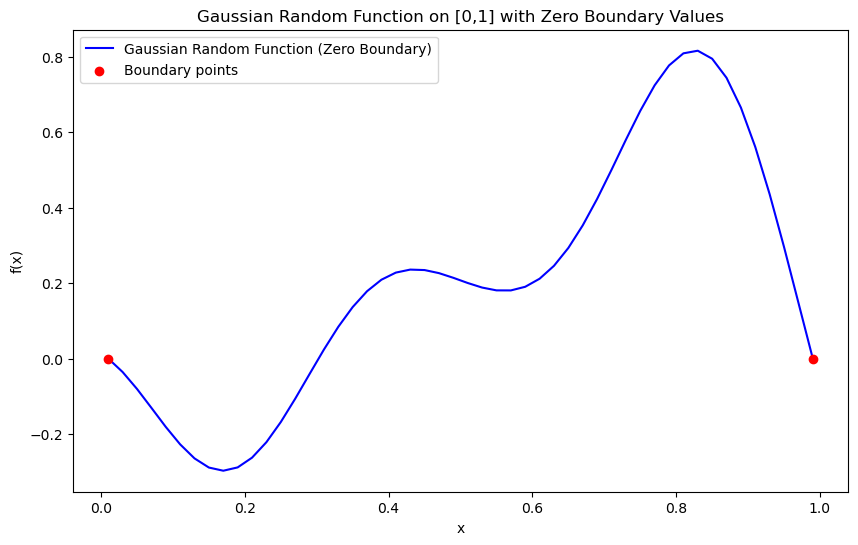

In [27]:
# In this cell, we plot the loaded initial values.
import matplotlib.pyplot as plt

def plot_random_function(cell_centers, random_function):
    """
    Plot the Gaussian random function with zero boundary values.

    Parameters:
    - cell_centers: Array of points where the function is evaluated.
    - random_function: The Gaussian random function values at the cell centers.
    """
    boundary_points = [cell_centers[0], cell_centers[-1]]
    
    plt.figure(figsize=(10, 6))
    plt.plot(cell_centers, random_function, label="Gaussian Random Function (Zero Boundary)", color="blue")
    plt.scatter(boundary_points, [0, 0], color="red", zorder=5, label="Boundary points")
    plt.title("Gaussian Random Function on [0,1] with Zero Boundary Values")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Example usage:
plot_random_function(cell_centers, initials[1])

In [28]:
# In this cell, we define a function to solve the heat equation with the initial conditions.
import fipy as fp
from tqdm.notebook import tqdm

def solve_heat_equation(initial_value, t, alpha=1.0, nx=50):
    """
    Solve the heat equation u_t = alpha * u_xx with given initial conditions and 0 boundary conditions on [0, 1].

    Parameters:
    - initial_conditions: A function or array specifying the initial temperature distribution.
    - t: The time at which to evaluate the solution.
    - n_points: Number of grid points in the spatial domain.
    - alpha: The diffusion coefficient.
    - nx: The number of grid points for spatial discretization.

    Returns:
    - The solution at time t (a `CellVariable` object).
    """
    # Step 1: Create the mesh on the domain [0, 1]
    L = 1.0  # Length of the domain
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx)

    # Step 2: Define the variable for temperature (solution to the heat equation)
    temperature = fp.CellVariable(name="Temperature", mesh=mesh)

    # Set initial condition
    temperature.setValue(initial_value)

    # Step 3: Define the equation for the heat equation
    eq = fp.TransientTerm() == alpha * fp.DiffusionTerm(coeff=alpha)

    # Step 4: Set boundary conditions (temperature = 0 at x = 0 and x = 1)
    temperature.constrain(0, where=mesh.facesLeft)   # Boundary condition at x = 0
    temperature.constrain(0, where=mesh.facesRight)  # Boundary condition at x = 1

    # Step 5: Time-stepping loop to solve the equation
    time_step = 0.01  # Define a time step for the simulation
    steps = int(t / time_step)  # Calculate number of steps to reach time t

    for step in tqdm(range(steps), desc="Solving Heat Equation"):
        eq.solve(var=temperature, dt=time_step)

    return temperature

Solving Heat Equation:   0%|          | 0/1 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/5 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/10 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/20 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/50 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/100 [00:00<?, ?it/s]

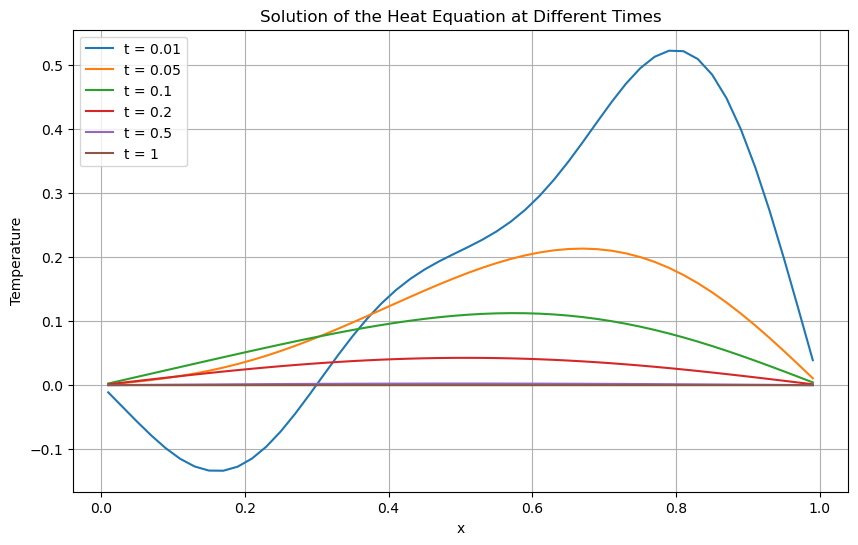

In [40]:
# In this function, we try the solve_heat_equation function and plot the results at different time values.

# Define the time values to plot
time_values = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

# Plot the results for different time values
plt.figure(figsize=(10, 6))
for time in time_values:
    result = solve_heat_equation(initials[1], t=time, nx=n_points)
    plt.plot(cell_centers, result.value, label=f't = {time}')

plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Solution of the Heat Equation at Different Times')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# In this cell, we solve the heat equation with given initial conditions for time up to 1.

import fipy as fp
from tqdm.notebook import tqdm

def solve_heat_equations(initial_value, t, time_step=0.01, alpha=1.0, nx=50):
    """
    Solve the heat equation u_t = alpha * u_xx with given initial conditions and 0 boundary conditions on [0, 1].

    Parameters:
    - initial_conditions: A function or array specifying the initial temperature distribution.
    - t: The time at which to evaluate the solution.
    - n_points: Number of grid points in the spatial domain.
    - alpha: The diffusion coefficient.
    - nx: The number of grid points for spatial discretization.

    Returns:
    - A list of solutions at each time step (each element is a `CellVariable` object).
    """
    # Step 1: Create the mesh on the domain [0, 1]
    L = 1.0  # Length of the domain
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx)

    # Step 2: Define the variable for temperature (solution to the heat equation)
    temperature = fp.CellVariable(name="Temperature", mesh=mesh)

    # Set initial condition
    temperature.setValue(initial_value)

    # Step 3: Define the equation for the heat equation
    eq = fp.TransientTerm() == alpha * fp.DiffusionTerm(coeff=alpha)

    # Step 4: Set boundary conditions (temperature = 0 at x = 0 and x = 1)
    temperature.constrain(0, where=mesh.facesLeft)   # Boundary condition at x = 0
    temperature.constrain(0, where=mesh.facesRight)  # Boundary condition at x = 1

    # Step 5: Time-stepping loop to solve the equation
    steps = int(t / time_step)  # Calculate number of steps to reach time t

    # List to store the temperature at each time step
    solution = []

    #for step in tqdm(range(steps), desc="Solving Heat Equation"):
    for step in range(steps):
        eq.solve(var=temperature, dt=time_step)
        # Save the current temperature
        solution.append(temperature.copy())

    return solution

In [31]:
# In this cell, we solve the heat equation with all initial conditions generated from the Gaussian random function in the previous notebook.

time = 1

solutions = []

for initial in tqdm(initials, desc="Solving Heat Equations"):
    solutions.append(solve_heat_equations(initial, t=time, nx=n_points))
solutions = np.array(solutions)

Solving Heat Equations:   0%|          | 0/500 [00:00<?, ?it/s]

In [35]:
# In this cell, we save the solutions to the heat equation to a file.
import os
import numpy as np

# Define the directory where you want to save the file
save_directory = os.path.join(os.getcwd(), 'data')

# Create the directory if it does not exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

file_name = f'heat_solutions_{len(cell_centers)}.npy'
# Define the file path
file_path = os.path.join(save_directory, file_name)

# Save the random functions to the file
np.save(file_path, solutions)

print(f'File saved to: {file_path}')

File saved to: C:\Users\weiz828\DON\data\heat_solutions_50.npy


In [37]:
# In this cell, we load the solutions from the file.
import os
import numpy as np

# Define the directory where you want to save the file
save_directory = os.path.join(os.getcwd(), 'data')
file_name = f'heat_solutions_{len(cell_centers)}.npy'
# Define the file path
                
file_path = os.path.join(save_directory, file_name)

# Load the solutions from the file
solutions = np.load(file_path)

In [39]:
'''
# In this cell, we check the shape of the solutions array.
## The first dimension corresponds to the initial conditions. Note that we have 500 initial conditions in total.
## The second dimension corresponds to the time steps. Our time step is 0.01 and we solve the heat equation up to time equals 1. So there are 100 steps in total.
## The third dimension corresponds to the spatial grid points. We have 100 or 50 grid points in total.
'''
solutions.shape

(500, 100, 50)